### Importing the required libraries

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the required dataset

We have used the Portland House Price Prediction dataset which consists of 47 datapoints. For ease of computation, we have only used the Living Area feature. We have also augmented the dataset by adding a column consisting of all values equal to 1 to the start of the dataset.

In [609]:
# reading the txt file and converting it into csv file
df = pd.read_csv("portland_data.txt", header = None)
# adding the column names
df.columns = ['living_area', '#bedrooms', 'price']
# storing this dataframe in a csv file
df.to_csv('portland_house_data.csv', index = None)
df.head()

,living_area,#bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [610]:
# dropping the number of bedrooms column
df = df.drop(['#bedrooms'], axis = 1)
df.head()

,living_area,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [611]:
df.shape

(47, 2)

In [612]:
# creating the augmented column
temp = [1 for i in range(0, df.shape[0])]
df.insert(0, 'x0', temp)
df.head()

,x0,living_area,price
0,1,2104,399900
1,1,1600,329900
2,1,2400,369000
3,1,1416,232000
4,1,3000,539900


In [613]:
df.shape

(47, 3)

### Separating the dataset into X and Y

In [614]:
x_df = df.iloc[:, 0:-1]
x_df.head()

,x0,living_area
0,1,2104
1,1,1600
2,1,2400
3,1,1416
4,1,3000


In [615]:
y_df = df.iloc[:, -1]
y_df.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [616]:
augmented_x = x_df.to_numpy()
true_y = y_df.to_numpy()

### Linear Regression using LMS 

We have chosen the initial values of $\theta$ to be random and the learning rate ($\alpha$) is also chosen to be very small and is equal to $10^{-10}$. Then for every feature and every point in the dataset, we run a loop for 1000 iterations, where for a single training sample, we do the the following update:

$$ \theta_j = \theta_j + \alpha*(y^{(i)} - h(x^{(i)}))x_j^{(i)} $$

The above rule is called the $\text{Least Mean Square Update Rule}$. Thus, for multiple training samples, our final algorithm becomes as follows:

$$ \theta_j = \theta_j + \alpha*\sum_{i=1}^{m} (y^{(i)} - h(x^{(i)}))x_j^{(i)} $$

which is repeated till convergence.

In [617]:
def linear_regression(true_y, n, augmented_x):
    
    no_features = augmented_x.shape[1]
    
    # vector that denotes theta = [theta_0, theta_1, ....] -> taking the initial guess to be random values
    theta = np.random.rand(no_features)
    
    # choosing alpha to be a random value between 0 and 1
    learning_rate = 1e-10
    
    # for every row x in data, we have h(x) = theta_0 + theta_1*x1 
    hypothesis = np.zeros(shape = (n, 1), dtype = np.float128)
    
    for epoch in range(0, 1000):
        for each_feature in range(0, no_features):
            for each_row in range(0, augmented_x.shape[0]):
                # updating h(x) as -> h(x) = theta_0 + theta_1*x1 
                hypothesis[each_row] = np.dot(augmented_x[each_row], theta)

                # updating each theta feature -> theta_j = theta_j + alpha * (y_i - h(x_i)) * x_i_j
                theta[each_feature] = theta[each_feature] + learning_rate*(true_y[each_row] - hypothesis[each_row])*augmented_x[each_row][each_feature]
    
    return theta, hypothesis

In [618]:
theta, hypothesis = linear_regression(true_y = true_y, n = augmented_x.shape[0], augmented_x = augmented_x)

### Plotting the Predictions

The plot below visualizes the learnt house prices (in red) on the scatter plot of the input training dataset.

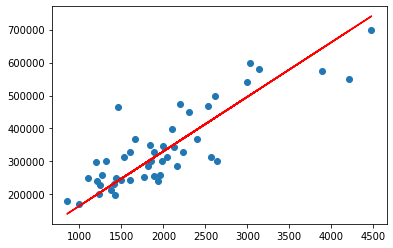

In [619]:
living_area = df.iloc[:, 1]
living_area = living_area.to_numpy()
hypothesis0 =  theta[0] + theta[1] * living_area

plt.scatter(living_area, true_y)
plt.plot(living_area, hypothesis0, 'red')
plt.show()